In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:

id=[]
for i in range(123):
    id.append(i+1)
print(id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]


In [58]:
d = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv')
d.drop(columns = ['date'],inplace=True)

#d['ID']=id
d.insert(0, 'ID', id)
d

,ID,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
0,1,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1,2,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
2,3,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
3,4,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
4,5,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8
...,...,...,...,...,...,...,...,...,...
118,119,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
119,120,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
120,121,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
121,122,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6


In [59]:
d.columns

Index(['ID', 'rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

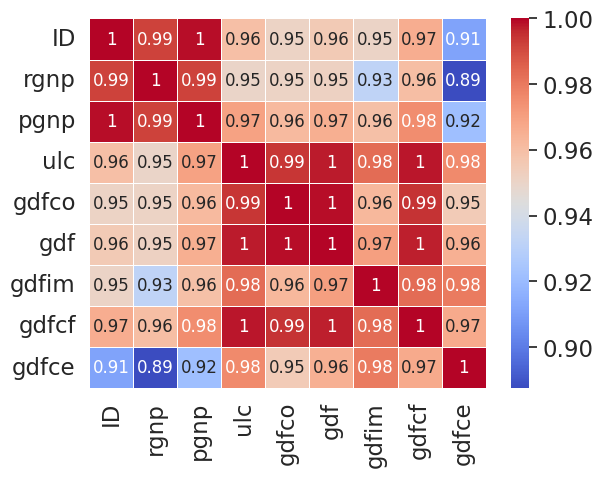

In [91]:
ax=sns.heatmap(d.corr(),cmap='coolwarm',annot=True,annot_kws={'size': 12},linewidths=0.5,
           cbar=True)
plt.show()

In [68]:
#features correlation investigation
from statsmodels.tsa.stattools import grangercausalitytests

variables=d.columns  
matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
for col in matrix.columns:
    for row in matrix.index:
        test_result = grangercausalitytests(d[[row, col]], maxlag=20, verbose=False)            
        p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]            
        min_p_value = np.min(p_values)
        matrix.loc[row, col] = min_p_value
matrix.columns = [var + '_x' for var in variables]
matrix.index = [var + '_y' for var in variables]
print(matrix)



InfeasibleTestError: The Granger causality test statistic cannot be compute because the VAR has a perfect fit of the data.

In [ ]:
# Multiplicative Decomposition (y = Trend * Seasonal * Residuals)
result_mul=[]
for name, column in data.iteritems():
    result_mul.append(seasonal_decompose(df['column.name'], model='multiplicative'))

# Let's remove seasons
df['deseasonalized'] = df.value.values/result_mul.seasonal
df['linearized'] = np.log(df['deseasonalized'])

In [ ]:

# stationarity test
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in data.iteritems():
    adfuller_test(column, name=column.name)

In [ ]:
#features differencing
data_differenced = data.diff().dropna()
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)
    
#second fifferencing
data_differenced2 = data_differenced.diff().dropna()
for name, column in data_differenced2.iteritems():
    adfuller_test(column, name=column.name)

In [5]:
pip install hana-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 1.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 1.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=fad166b45fd193925a56d940110e7ccbf24efc168d1424cf1e0971b8fe0442f8
  Stored in directory: /home/useradd/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [8]:
#Building the model
from hana_ml.algorithms.pal.tsa.vector_arima import VectorARIMA

vectorArima1 = VectorARIMA(order=(p, d, q), model_type = 'VARMA', search_method='grid_search', output_fitted=True, max_p=5, max_q=5)
vectorArima1.fit(data=df_train)

print(vectorArima1.model_.collect())
print(vectorArima1.fitted_.collect())
print(vectorArima1.model_.collect()['CONTENT_VALUE'][3])

In [ ]:
vectorArima2 = VectorARIMA(order=(p, d, q), model_type = 'VARMA', search_method='eccm', output_fitted=True, max_p=5, max_q=5)
vectorArima2.fit(data=df_train)

print(vectorArima2.model_.collect())
print(vectorArima2.fitted_.collect())
print(vectorArima2.model_.collect()['CONTENT_VALUE'][3])

In [ ]:
eccm = np.array ([])
eccm = eccm.reshape(6,6)
eccm = pd.DataFrame(np.asmatrix(eccm))

orders = ['0', '1', '2', '3', '4', '5']
eccm.columns = ['q='+ q for q in orders]
eccm.index = ['p='+ p for p in orders]
print(eccm)